<a href="https://colab.research.google.com/github/anguyen11097/NGG6050/blob/main/20231002_ADN_LinearRegressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises

The following code was generated using ChatGPT with the following prompt:

"Given the following dataset:
Age	| Wing Length
-- | --
3	| 1.4
4	| 1.5
5	| 2.2
6	| 2.4
7	| 3.1
8	| 3.2
9	| 3.2
11	| 3.9
12	| 4.1
14	| 4.7
15	| 4.5
16	| 5.2
17 | 5.0

Help me create a python script, using separate code chunks, that does the following:
1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line, with Age on the x-axis and Wing Length on the y-axis.
3. Calculate the p-value
4. Calculate and plot the confidence intervals on the slope of the regression.
4. Calculate  r^2 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes."

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	| Wing Length

3	| 1.4

4	| 1.5

5	| 2.2

6	| 2.4

7	| 3.1

8	| 3.2

9	| 3.2

11 | 3.9

12 | 4.1

14 | 4.7

15 | 4.5

16 | 5.2

17 | 5.0

1. Plot the relationship between Age and Wing Length.

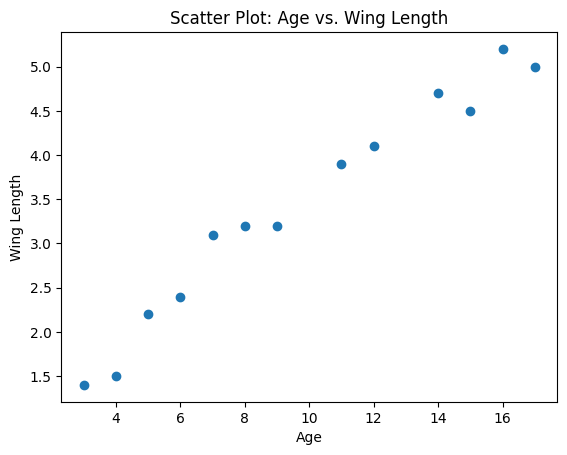

In [1]:
import matplotlib.pyplot as plt

# Your dataset
age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

plt.scatter(age, wing_length)
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Scatter Plot: Age vs. Wing Length')
plt.show()


2. Calculate and plot the regression line.

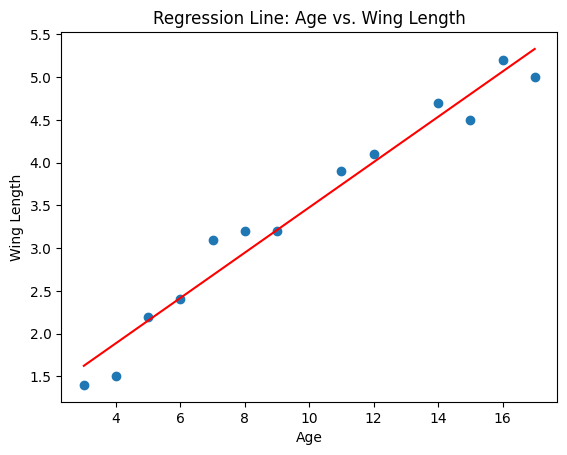

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape data for scikit-learn
age = np.array(age).reshape(-1, 1)
wing_length = np.array(wing_length)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(age, wing_length)

# Predict values
predicted_wing_length = model.predict(age)

# Plot the regression line
plt.scatter(age, wing_length)
plt.plot(age, predicted_wing_length, color='red')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.title('Regression Line: Age vs. Wing Length')
plt.show()


3. Can you reject, H0; b=0?

Yes, we can reject the null hypothesis under p<0.05.

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(age.flatten(), wing_length)
print(f'p-value: {p_value}')


p-value: 3.0097431724571258e-09


4. Calculate and plot the confidence intervals on the slope of the regression.

In [4]:
confidence_interval = stats.linregress(age.flatten(), wing_length)
print(f'95% Confidence Interval for Slope: ({confidence_interval.slope - 2 * confidence_interval.stderr}, {confidence_interval.slope + 2 * confidence_interval.stderr})')


95% Confidence Interval for Slope: (0.23356638145621234, 0.29580185986422025)


5. Calculate r^2
 (the coefficient of determination)

In [5]:
print(f'r^2 (Coefficient of Determination): {r_value**2}')


r^2 (Coefficient of Determination): 0.9633822518042855


6. Calculate Pearson's r.

In [6]:
print(f'Pearson\'s r: {r_value}')


Pearson's r: 0.9815203776816279


7. Add some noise to the data and see how the regression changes.

In [7]:
# Add random noise to wing_length
np.random.seed(0)
wing_length_noisy = wing_length + np.random.normal(0, 0.5, len(wing_length))

# Re-run the regression analysis with noisy data
slope_noisy, intercept_noisy, r_value_noisy, p_value_noisy, std_err_noisy = stats.linregress(age.flatten(), wing_length_noisy)

# Print the results
print(f'Original Data - p-value: {p_value}')
print(f'Noisy Data - p-value: {p_value_noisy}')


Original Data - p-value: 3.0097431724571258e-09
Noisy Data - p-value: 1.2216491625790316e-05
